### Case Study - Developing a Marketing Strategy for a Travel Insurance Company

The goal of this data analysis project is to identify possible differences in travel habits between customers and non-customers from a fictional Travel Insurance company. New insights from the data might help the company to develop a more efficient marketing strategy, targeting potential customers.

### 1. Data Inspection

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

df = pd.read_csv('travel_insurance.csv')
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


In [4]:
df.describe()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,35.000000,1.800000e+06,9.000000,1.000000,1.000000


In [5]:
df.isnull().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

#### Data Cleaning

It's important to check the dataset and familiarize with it before cleaning. Given the information about the dataset, some actions can be taken:

* modifying column names to use <b>snake case format</b> which gives more readability - regex will be useful here

* modify binary string columns (yes/no) to binary (0/1)

In [6]:
# modifying column names with regex
df.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', x).lower() for x in df.columns]
df.columns

Index(['age', 'employment _type', 'graduate_or_not', 'annual_income',
       'family_members', 'chronic_diseases', 'frequent_flyer',
       'ever_travelled_abroad', 'travel_insurance'],
      dtype='object')

In [7]:
# modifying binary strings to number format

df = df.replace({'Yes': 1, 'No': 0})
df.head()

,age,employment _type,graduate_or_not,annual_income,family_members,chronic_diseases,frequent_flyer,ever_travelled_abroad,travel_insurance
0,31,Government Sector,1,400000,6,1,0,0,0
1,31,Private Sector/Self Employed,1,1250000,7,0,0,0,0
2,34,Private Sector/Self Employed,1,500000,4,1,0,0,1
3,28,Private Sector/Self Employed,1,700000,3,1,0,0,0
4,28,Private Sector/Self Employed,1,700000,8,1,1,0,0


#### Identifying Outliers
Next, some columns may contain outliers which could warm the analysis. The columns `annual_income`, `age` and `family_member` have a range of values, which make them good candidates for outliers.

Below graphs show that there are none. The data is ready to explore.

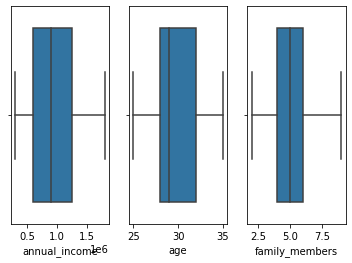

In [13]:
fig, ax = plt.subplots(1,3)
sns.boxplot(ax=ax[0], x='annual_income', data=df)
sns.boxplot(ax=ax[1], x='age', data=df)
sns.boxplot(ax=ax[2], x='family_members', data=df)
plt.show()

### 2. Exploratory Data Analysis

To observe the dataset as a whole, the ``.hist()`` method helps visualize the distribution for each numerical column.

To identify potential correlations between the variables, plotting a ``heatmap graph`` of a dataset of correlations is key.

C:\Users\ediga\AppData\Local\Temp\ipykernel_68256\1129888984.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'graduate_or_not'}>,
        <AxesSubplot:title={'center':'annual_income'}>],
       [<AxesSubplot:title={'center':'family_members'}>,
        <AxesSubplot:title={'center':'chronic_diseases'}>,
        <AxesSubplot:title={'center':'frequent_flyer'}>],
       [<AxesSubplot:title={'center':'ever_travelled_abroad'}>,
        <AxesSubplot:title={'center':'travel_insurance'}>,
        <AxesSubplot:>]], dtype=object)

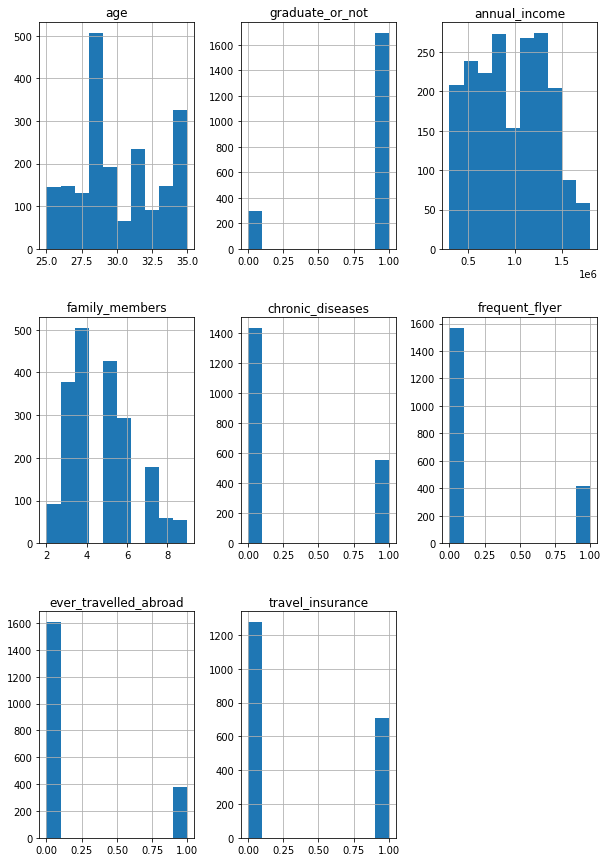

In [9]:
fig = plt.figure(figsize = (10,15))
ax = fig.gca()
df.hist(ax=ax)

C:\Users\ediga\AppData\Local\Temp\ipykernel_68256\621126171.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<AxesSubplot:>

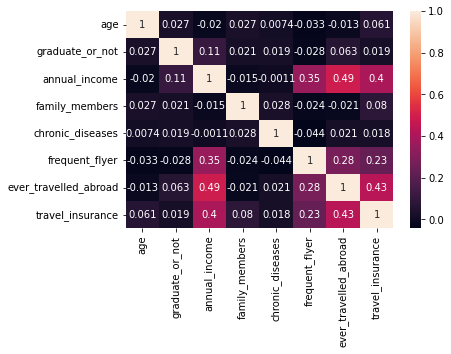

In [12]:
sns.heatmap(df.corr(), annot=True)

Given the requirements, is known that `travel_insurance` is the independent variable (the variable we want to predict). The company wants to create an effective marketing strategy by targeting customers that are more likely to buy travel insurance.

In the correlation heatmap above, it's clear that there are at least 3 dependent variables with a potential correlation with travel insurance: `ever_travelled_abroad`, `annual_income` and `frequent_flyer`, which makes perfect sense if you think about it. Also, these 3 dependent variables also have correlation between each other, which enphasises the behavior.

`ever_travelled_abroad` and `annual_income` have a moderate correlation, whereas `frequent_flyer` have a weak to moderate correlation, but still worth analyzing.

<AxesSubplot:>

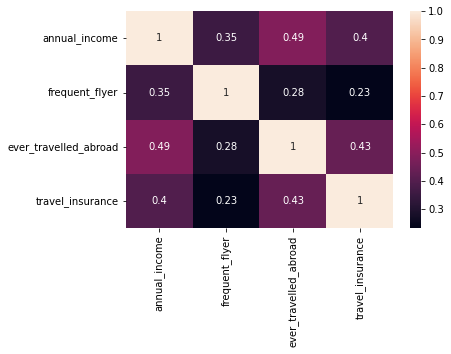

In [15]:
sns.heatmap(df[['annual_income', 'frequent_flyer', 'ever_travelled_abroad', 'travel_insurance']].corr(), annot=True)

A scatterplot would help to visualize the linear correlation. However, as seen below, it's not ideal. The independent variable is binary, (either 0 or 1).

<AxesSubplot:xlabel='annual_income', ylabel='travel_insurance'>

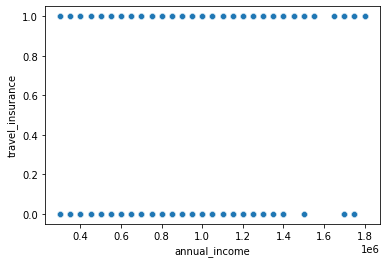

In [16]:
sns.scatterplot(x='annual_income', y='travel_insurance', data=df)

 It's clear that a liner regression wouldn't fit the data well, since it would most certainly have values outside the 0 and 1 range, given that the line is infinity.

 A better tool here is using logistic regression to analyze the probability of an outcome (buy travel insurance) given predictors.